In [1111]:
import random as re
import copy
import numpy as np
import matplotlib.pyplot as plt

In [1091]:
board=[]
queueSnake=[]
foodIdx=[]
freeIdx=set()

In [1092]:
#Board size
n=int(input())

5


In [1093]:
#CREATE THE GAME BOARD
#Store the free spaces
for i in range(n):
    row=[]
    for j in range(n):
        row.append(0)
        freeIdx.add((i,j))
    board.append(row)

In [1094]:
#SNAKE->[Head,....,Tail]
queueSnake=[(n//2,n//2)]

#Snake idx and food idx is not free space
#SNAKE HEAD 180
#Snake body 120
#Food 255
for i in queueSnake:
    freeIdx.remove(i)
    board[i[0]][i[1]]=180
foodIdx=[re.choice(list(freeIdx))]
freeIdx.remove(foodIdx[0])
board[foodIdx[0][0]][foodIdx[0][1]]=255

In [1095]:
board

[[0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 180, 0, 0],
 [0, 0, 0, 0, 255],
 [0, 0, 0, 0, 0]]

In [1099]:
def bfs(dp,queue,tail):
    while queue:
        idx=queue.pop(0)
        i=idx[0]
        j=idx[1]
        step=idx[2]
        if i>-1 and i<len(dp) and j>-1 and j<len(dp[0]):
            if dp[i][j]==0 or (i==tail[0] and j==tail[1]):
                dp[i][j]=step
                queue.append([i+1,j,step+[[i+1,j]]])
                queue.append([i,j+1,step+[[i,j+1]]])
                queue.append([i,j-1,step+[[i,j-1]]])
                queue.append([i-1,j,step+[[i-1,j]]])
            elif dp[i][j]==120:
                pass
            elif dp[i][j]==255: #FOOD
                dp[i][j]=step
                return dp,[i,j]
            
    print("GAME OVER")
    return 0,[-1,-1]
        

In [1100]:
#GAME POINTS
point=0

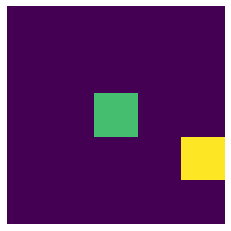

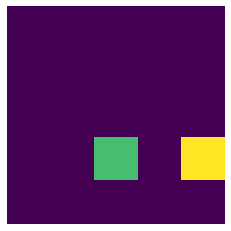

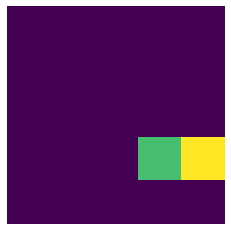

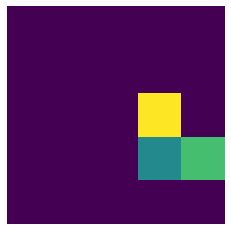

Point:  1


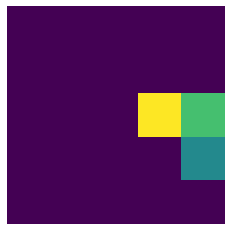

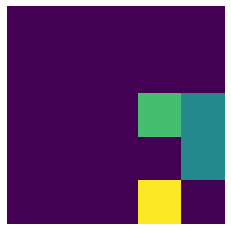

Point:  2


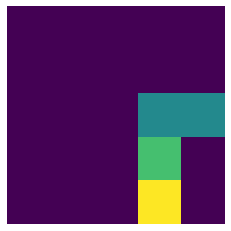

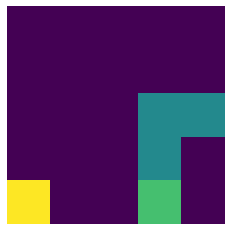

Point:  3


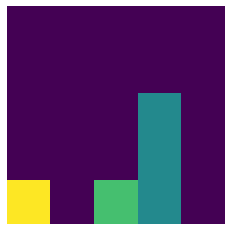

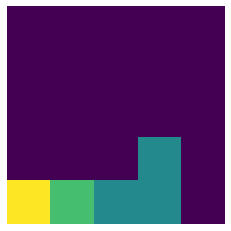

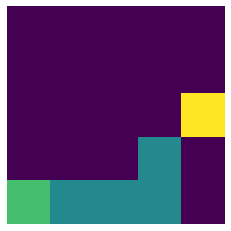

Point:  4


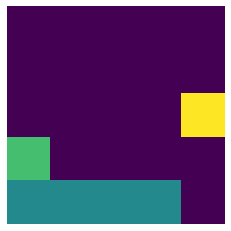

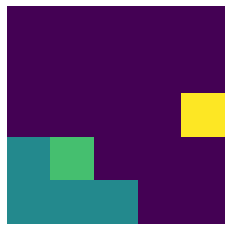

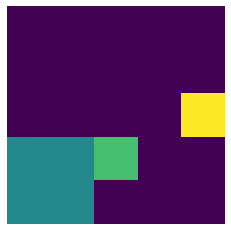

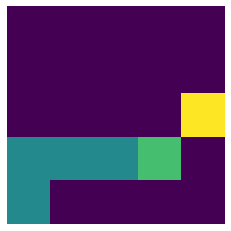

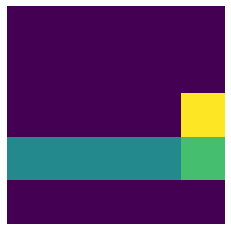

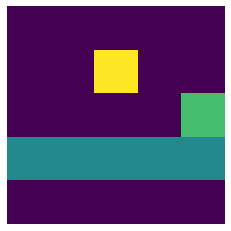

Point:  5


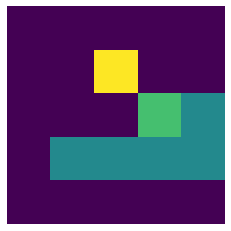

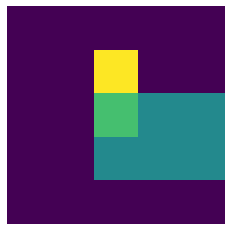

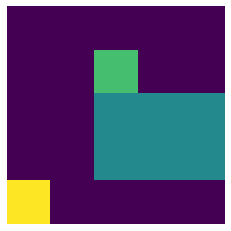

Point:  6


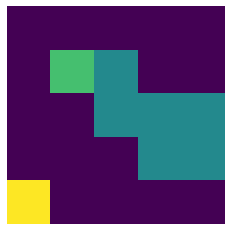

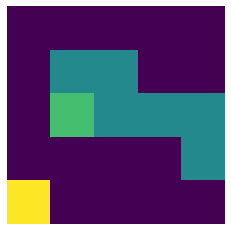

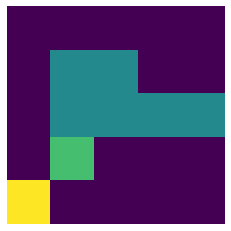

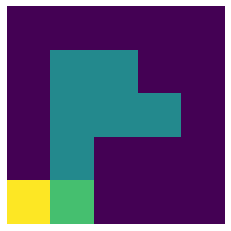

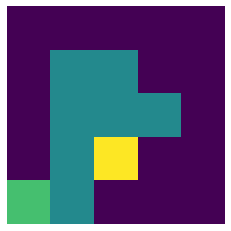

Point:  7


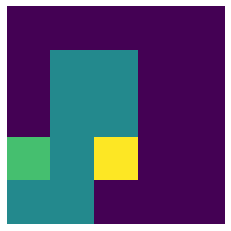

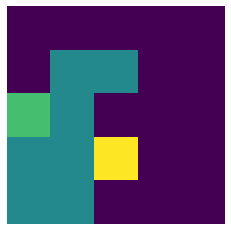

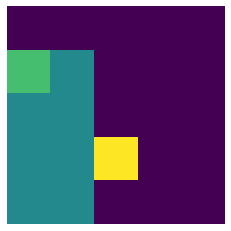

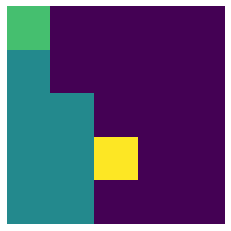

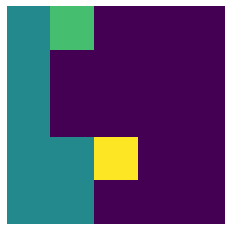

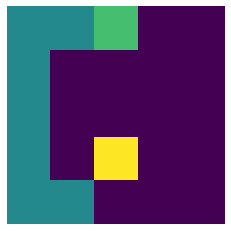

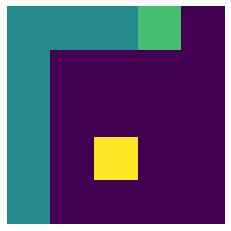

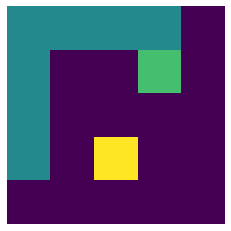

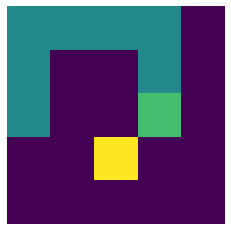

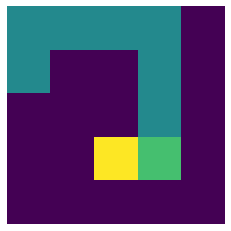

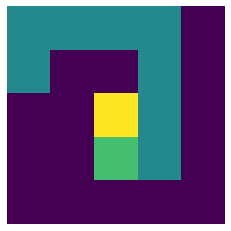

Point:  8


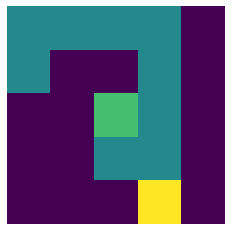

Point:  9


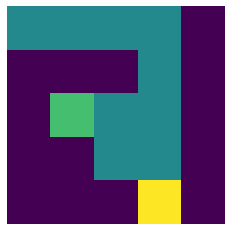

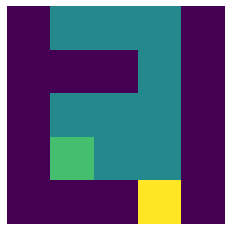

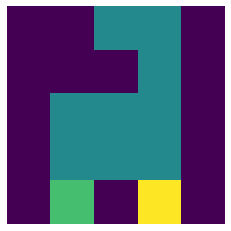

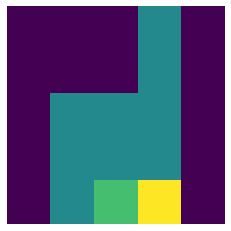

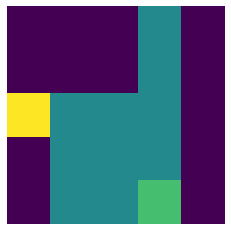

Point:  10


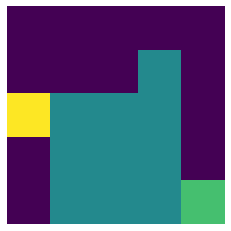

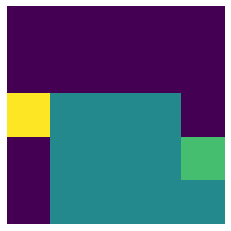

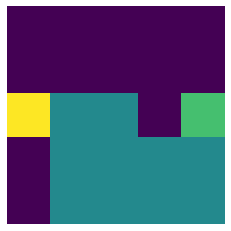

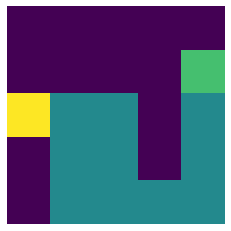

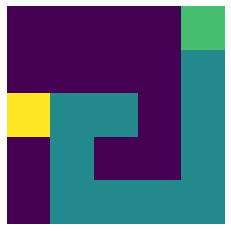

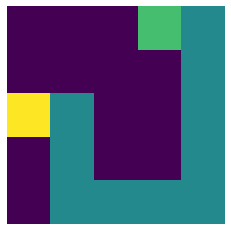

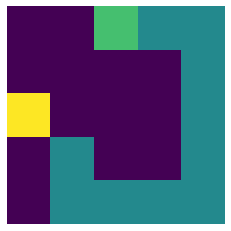

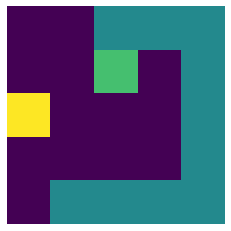

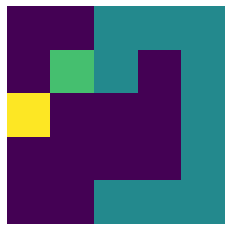

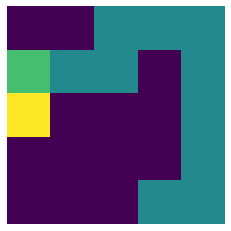

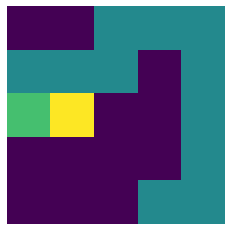

Point:  11


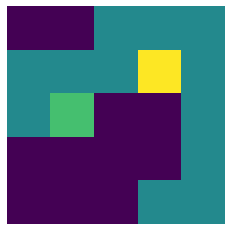

Point:  12


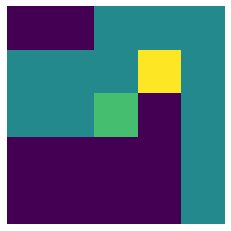

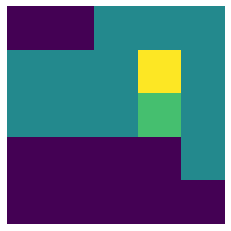

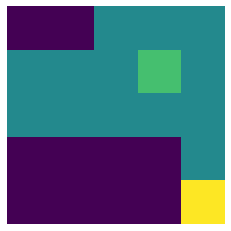

Point:  13
GAME OVER


In [1101]:
#Converting board into matrix
mat=np.array(board,dtype=np.uint8)
plt.imshow(mat,cmap='viridis')
plt.axis('off')
plt.show()

while True:
    #Create dp of board.... not to spoil the primary board
    dp=copy.deepcopy(board)
    #Snake head idx
    i=queueSnake[0][0]
    j=queueSnake[0][1]
    
    
    queue=[[i,j,[[i,j]]]]
    
    #Remove move the snake head
    dp[i][j]=0
    
    #IF snake length is less than 5... we cant traverse through tail end
    if len(queueSnake)<5:
        tail=[None,None]
    else:
        tail=[queueSnake[-1][0],queueSnake[-1][1]] #Tail's end can be traversed through
        
    #CALL the bfs Function..... get the food idx
    dp,fIdx=bfs(dp,queue,tail)
    
    #When game over... board distroyed
    if dp==0:
        break
    
    #at dp food index... we also stored the path to reach that position [Head,.....,food]
    path=dp[fIdx[0]][fIdx[1]]
    del dp  #Free dp
    
    
    
    previous=None
    for i in path[1:]:
        free=queueSnake.pop()
        freeIdx.add((free[0],free[1]))  #Free the tail
    #     print('free',free[0],free[1])
        board[free[0]][free[1]]=0
        previous=free #to increase snake length... to which the tail just left
        board[i[0]][i[1]]=180  #New head
        queueSnake.insert(0,[i[0],i[1]]) #Head inserted
        if point>0: #When no body formed
            board[queueSnake[1][0]][queueSnake[1][1]]=120
        if i[0]==path[-1][0] and i[1]==path[-1][1]: #when the food is reached... create new food, and increase body
            #SNAKE LENGTH INCREASE
            board[previous[0]][previous[1]]=120
            queueSnake.append([previous[0],previous[1]])
            freeIdx.remove((previous[0],previous[1]))
            # print('Not free',previous[0],previous[1])

            #############################################################
            #FOOD CREATING
            foodIdx=[re.choice(list(freeIdx))]
            freeIdx.remove(foodIdx[0])
            board[foodIdx[0][0]][foodIdx[0][1]]=255
            #############################################################
        else:

            freeIdx.remove((i[0],i[1]))   #Engage the new head except the food which is head now
    #         print('not free',i[0],i[1])
       # display(board)
        mat=np.array(board,dtype=np.uint8)
        plt.imshow(mat,cmap='viridis')
        plt.axis('off')
        plt.show()

    point+=1
    print("Point: ",point)